In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import ej3
import scipy.stats as scs
import math

In [3]:
images = np.load('ej3/train_images.npy')
labels = np.loadtxt('ej3/train_labels.csv', delimiter=',', skiprows=1, usecols=(0,))
test_images = np.load('ej3/test_images.npy')
test_labels = np.loadtxt('ej3/test_labels.csv', delimiter=',', skiprows=1, usecols=(0,))

In [4]:
model = ej3.Model()
model.fit(images, labels)
print('Score: %', model.score(test_images, test_labels) * 100)

Score: % 37.019999999999996


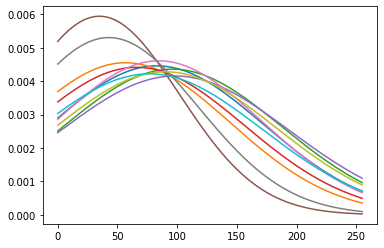

In [5]:
gauss_params = [(np.mean(images[labels == cat]), np.std(images[labels == cat])) for cat in range(0,10)]


#x, y = 14, 14
xs = np.linspace(0,255,255)

for cat in range(10):
    media = gauss_params[cat][0]
    desvio = gauss_params[cat][1]
    pdf = scs.norm(media, desvio)
    plt.plot(xs, pdf.pdf(xs))
plt.show()


In [12]:
gauss_params = [(p[0], p[1], scs.norm(p[0], p[1])) for p in gauss_params]

img = test_images[0].flatten()

totals = list()

totals = [np.sum(np.log(c[2].pdf(img))) for c in gauss_params]


print("Totals: ", totals)
print(ej3.index_of_max(totals))

Totals:  [-4578.445778103313, -4547.769732506409, -4618.323011171757, -4554.658734640958, -4630.339402584152, -4615.901497519662, -4579.472468239886, -4561.056737635805, -4601.758636678499, -4575.345349874457]
1


In [18]:
model = ej3.GaussModel()
model.fit(images, labels)
print('Score: %', model.score(test_images, test_labels) * 100)

Score: % 25.3
